In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

60000 60000 10000 10000


In [5]:
# Scaling a dataset
X_train = X_train / 255 
X_test = X_test / 255 

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
X_train[0].shape

(28, 28)

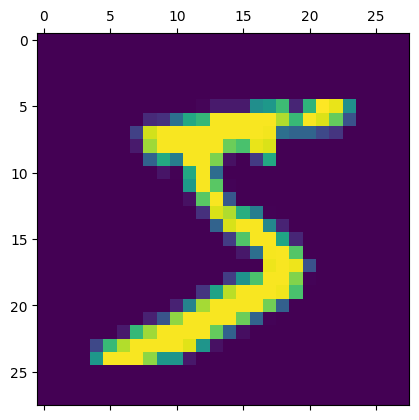

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
print(X_train.shape, X_test.shape)
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

print(X_train_flat.shape, X_test_flat.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  
)

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4645 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2827 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9251


In [12]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.9249


[0.26869121193885803, 0.9248999953269958]

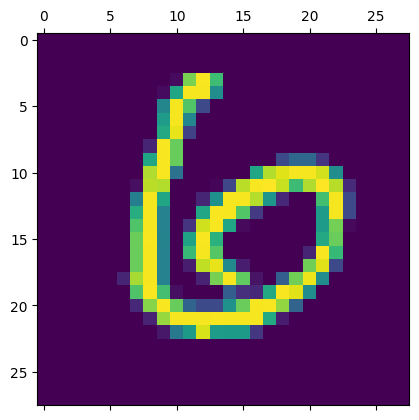

In [13]:
plt.matshow(X_test[11])

In [14]:
y_predicted = model.predict(X_test_flat)

313/313 [==============================] - 0s 1ms/step


In [15]:
y_predicted[11]

array([8.0714198e-03, 8.7211240e-04, 1.6233225e-01, 1.7473150e-02,
       4.8234551e-03, 1.5268342e-03, 7.7001172e-01, 1.1164955e-05,
       3.0257317e-01, 2.9454686e-04], dtype=float32)

([<matplotlib.patches.Wedge at 0x1d10259b8e0>,
 [Text(1.0997800539146614, 0.021996204478607808, '0'),
  Text(1.099022699819015, 0.046358443486849574, '1'),
  Text(0.9921535514365302, 0.47500666350260884, '2'),
  Text(0.6906395931547239, 0.8561640919631457, '3'),
  Text(0.6423134998131957, 0.8929912474138388, '4'),
  Text(0.6281846292423476, 0.9029861967846765, '5'),
  Text(-1.0610127695734786, 0.290261783226825, '6'),
  Text(0.07692447864461288, -1.09730698739471, '7'),
  Text(0.8040175619676718, -0.7507035100807516, '8'),
  Text(1.0999997070728584, -0.0008027699707652356, '9')])

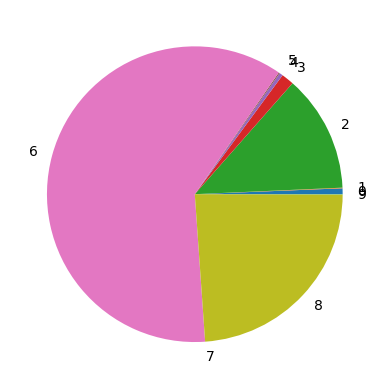

In [16]:
plt.pie(y_predicted[11], labels=range(10))

In [17]:
np.argmax(y_predicted[11])

6

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,   11,  917,   16,    7,    3,   12,   10,   45,    3],
       [   4,    0,   18,  922,    0,   20,    2,   11,   27,    6],
       [   2,    1,    4,    1,  920,    0,    9,    4,   11,   30],
       [  11,    2,    4,   38,   10,  758,   13,    6,   43,    7],
       [  12,    3,    9,    1,    7,   11,  908,    2,    5,    0],
       [   1,    5,   23,    9,    8,    1,    0,  949,    4,   28],
       [   7,    8,    5,   15,    9,   16,    7,   12,  889,    6],
       [  11,    7,    1,   11,   32,    5,    0,   25,    8,  909]])>

Text(70.72222222222221, 0.5, 'Truth')

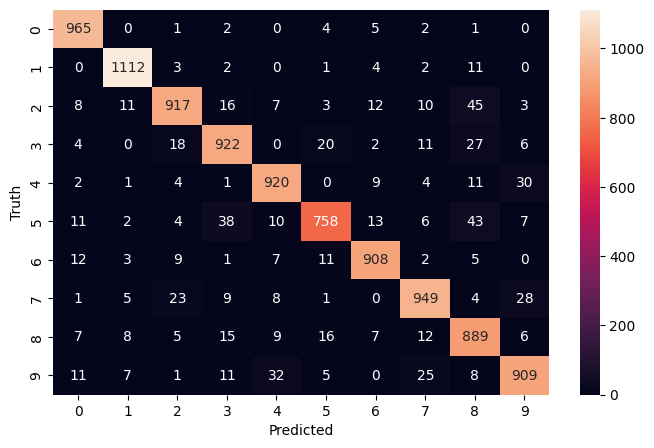

In [20]:
import seaborn as sn

plt.figure(figsize=(8, 5))

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # since output has fixed categories
    metrics=['accuracy']  
)

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2757 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1252 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9838


In [22]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9771


[0.07075190544128418, 0.9771000146865845]

313/313 [==============================] - 1s 2ms/step


Text(70.72222222222221, 0.5, 'Truth')

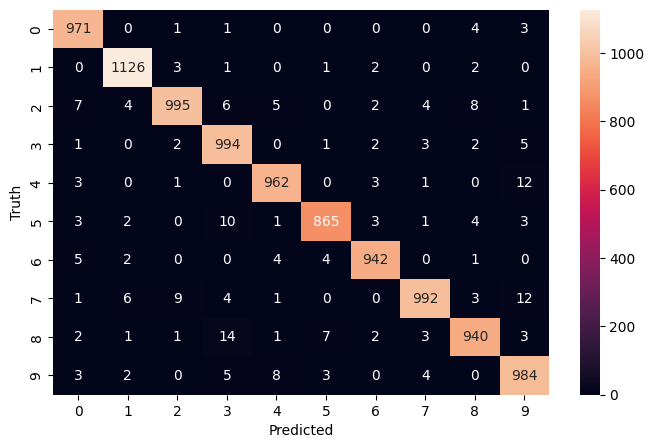

In [23]:
y_predicted = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(8, 5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2705 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1276 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0882 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0678 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0540 - accuracy: 0.9832


In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9754


[0.07847143709659576, 0.9753999710083008]

313/313 [==============================] - 1s 2ms/step


Text(70.72222222222221, 0.5, 'Truth')

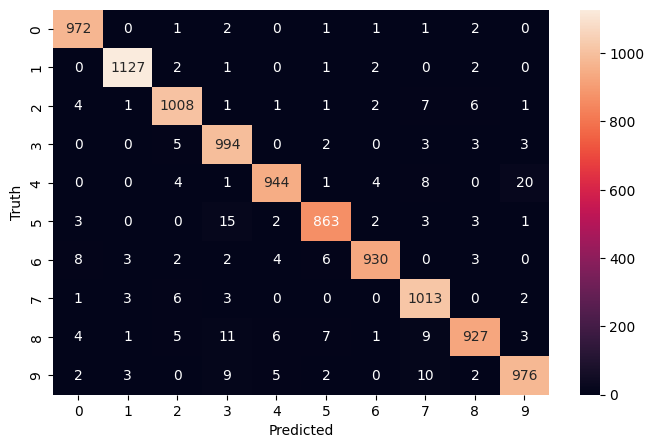

In [26]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(8, 5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')